In [1]:
import sys
sys.path.append("..")

import numpy as np
from scipy import stats
from IPython.display import Image, display

import corner

import datetime
import random

import copy

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rcParams

import datetime
%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.format'] = 'png'

cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))
%config InlineBackend.figure_format = 'retina'


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
machine = 'mac'
#machine = 'magny'
machine = 'virgo'

if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
   

In [3]:
startsnap  = 60
endsnap    = 128
mergersnap = 108
mergerindex = -(endsnap - mergersnap)

snapnum_all = []
R0_kpc_all =[]
v0_kms_all =[]
a_MND_kpc_all =[]
b_MND_kpc_all =[]
a_HB_kpc_all =[]
a_NFWH_kpc_all =[]
v0_MND_kms_all =[]
v0_HB_kms_all =[]
v0_NFWH_kms_all =[]

for i in range (startsnap, endsnap,1):
    snapnum, R0_kpc, v0_kms, a_MND_kpc, b_MND_kpc, a_HB_kpc, a_NFWH_kpc, v0_MND_kms, v0_HB_kms, v0_NFWH_kms = np.loadtxt(filedir + 'potential/potential_params_dec18/pot_snap_{}'.format(i))
    snapnum_all.append(snapnum) 
    R0_kpc_all.append(R0_kpc)
    v0_kms_all.append(v0_kms)
    a_MND_kpc_all.append(a_MND_kpc)
    b_MND_kpc_all.append(b_MND_kpc)
    a_HB_kpc_all.append(a_HB_kpc)
    a_NFWH_kpc_all.append(a_NFWH_kpc)
    v0_MND_kms_all.append(v0_MND_kms)
    v0_HB_kms_all.append(v0_HB_kms)
    v0_NFWH_kms_all.append(v0_NFWH_kms)
age = np.loadtxt(filedir + 'auriga/survivor_overview_all_snapshots.txt',usecols = 1, skiprows=2)


age = age[-len(R0_kpc_all):]

mergertime = age[mergerindex]


In [4]:
# take mean of potential after last merger (mergertime 1) and keep it fixed to see if actions still vary that much in a non-varying potential

R0_kpc_mean      = np.mean(R0_kpc_all[mergerindex:]) 
v0_kms_mean      = np.mean(v0_kms_all[mergerindex:])
a_MND_kpc_mean   = np.mean(a_MND_kpc_all[mergerindex:])  
b_MND_kpc_mean   = np.mean(b_MND_kpc_all[mergerindex:])
a_HB_kpc_mean    = np.mean(a_HB_kpc_all[mergerindex:])
a_NFWH_kpc_mean  = np.mean(a_NFWH_kpc_all[mergerindex:])
v0_MND_kms_mean  = np.mean(v0_MND_kms_all[mergerindex:])
v0_HB_kms_mean   = np.mean(v0_HB_kms_all[mergerindex:])
v0_NFWH_kms_mean = np.mean(v0_NFWH_kms_all[mergerindex:])

n_NFWH_mean = v0_NFWH_kms_mean**2 / v0_kms_mean**2
n_HB_mean   = v0_HB_kms_mean**2   / v0_kms_mean**2
n_MND_mean  = v0_MND_kms_mean**2  / v0_kms_mean**2

duration_norm = len(age[mergerindex:])/len(age)
print('Sum of normalization factors: {}'.format(np.sum([n_NFWH_mean, n_HB_mean, n_MND_mean])))

savedata = [mergersnap, R0_kpc_mean, v0_kms_mean, a_MND_kpc_mean, b_MND_kpc_mean, a_HB_kpc_mean, a_NFWH_kpc_mean, v0_MND_kms_mean, v0_HB_kms_mean, v0_NFWH_kms_mean, n_NFWH_mean, n_HB_mean, n_MND_mean]
header = 'mergersnap, R0_kpc_mean, v0_kms_mean, a_MND_kpc_mean, b_MND_kpc_mean, a_HB_kpc_mean, a_NFWH_kpc_mean, v0_MND_kms_mean, v0_HB_kms_mean, v0_NFWH_kms_mean, n_NFWH_mean, n_HB_mean, n_MND_mean'
np.savetxt(filedir + 'potential/potential_params_dec18/mean_pot_params.txt', savedata, header = header)



Sum of normalization factors: 0.9962464203109607


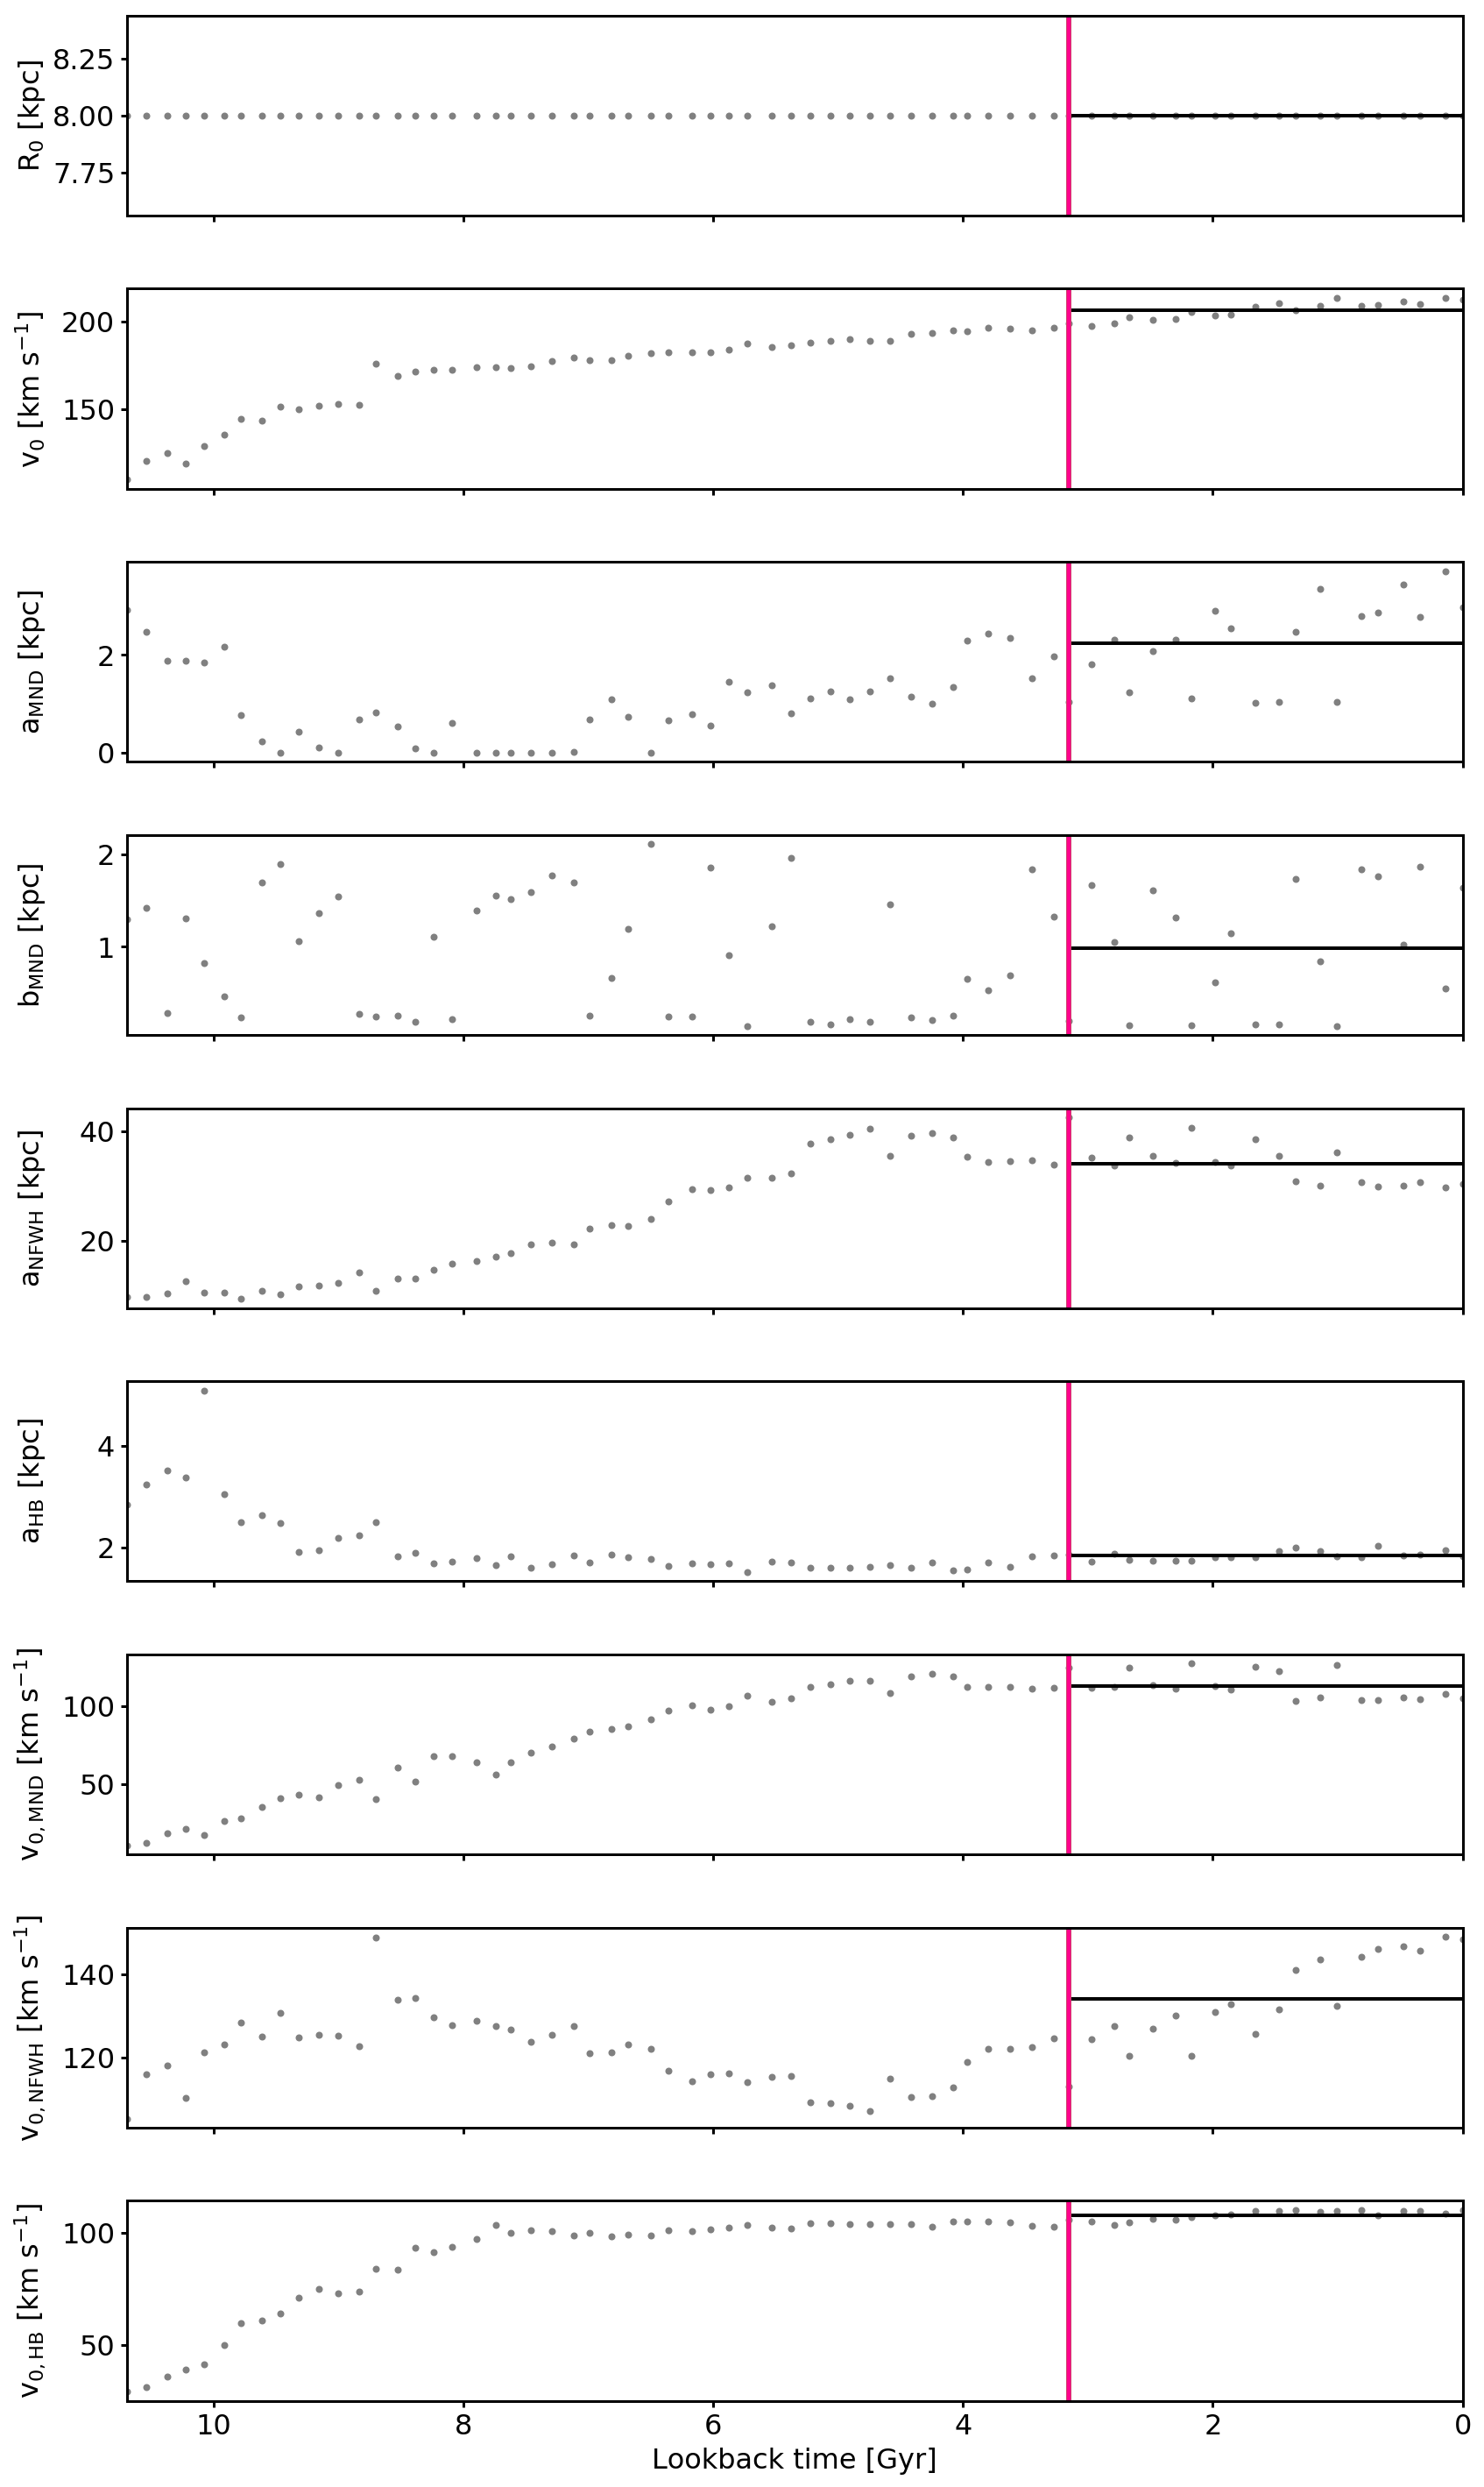

In [6]:
mean_color = 'grey'

ndim = 9
labels = ["R$_{0}$ [kpc]","v$_0$ [km s$^{-1}$]","a$_{\mathrm{MND}}$ [kpc]","b$_{\mathrm{MND}}$ [kpc]","a$_{\mathrm{NFWH}}$ [kpc]","a$_{\mathrm{HB}}$ [kpc]","v$_{0, \mathrm{MND}}$ [km s$^{-1}$]","v$_{0, \mathrm{NFWH}}$ [km s$^{-1}$]","v$_{0, \mathrm{HB}}$ [km s$^{-1}$]"]

params = np.vstack([R0_kpc_all, v0_kms_all,a_MND_kpc_all, b_MND_kpc_all, a_NFWH_kpc_all, a_HB_kpc_all, v0_MND_kms_all, v0_NFWH_kms_all, v0_HB_kms_all])

mean_params = [R0_kpc_mean, v0_kms_mean, a_MND_kpc_mean, b_MND_kpc_mean, a_NFWH_kpc_mean, a_HB_kpc_mean, v0_MND_kms_mean, v0_NFWH_kms_mean, v0_HB_kms_mean]
jj = 4 # looked best
f, axes = plt.subplots(ndim, 1, figsize=(12,20), sharex=True)
for ii in range(ndim):
    axes[ii].set_ylabel(labels[ii])
    if ii == (ndim - 1):
        axes[ii].set_xlabel('Lookback time [Gyr]')
    
    x = age
    y = params[ii]
    axes[ii].plot(x,y, '.', c = 'grey')
    y2 = mean_params[ii]
    axes[ii].axhline(y = y2, xmin = 1.-duration_norm, color = 'k', linewidth = 2)
    axes[ii].set_xlim(np.max(age), np.min(age))
    axes[ii].get_yaxis().set_label_coords(-0.06,0.5)
    axes[ii].axvline(mergertime, color = 'xkcd:dark pink', linewidth = 3)
    axes[ii].axvline(mergertime, color = 'xkcd:hot pink', linewidth = 2)
        

f.tight_layout()
f.savefig(plotdir+'potential/potential_evolution_with_mean_jan19.png', format = 'png', dpi = 300, bbox_to_inches = 'tight')
plt.show()